# Total CPI Index

# CPI Time Series Analysis
This Jupyter notebook aims to provide a comprehensive exploration of Consumer Price Index (CPI) data, utilizing various techniques and models for in-depth time series analysis.

# What is CPI?
Consumer Price Index (CPI) is a widely used economic indicator that measures changes in the average price level of goods and services purchased by households over time. It is commonly used to track inflation and reflect the cost of living for consumers. During a hyperinflation, these indicators can be viable to track the expenditure for the general population of Türkiye.

<img width=75% src="https://www.investopedia.com/thmb/2Ste1u7rBkpIj5bMDuQkx_jjk04=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/consumerpriceindex_final-2bbbfc247d8e48c5b73b8b9a3d151a16.png">

> [Investopedia: CPI explained](https://www.investopedia.com/terms/c/consumerpriceindex.asp)

## Purpose
CPI is designed to provide insight into the rate at which prices of goods and services are changing in an economy. It helps measure inflation and assess the purchasing power of consumers.

## Calculation
CPI is calculated by collecting and analyzing data on the prices of a basket from different representative goods and services commonly consumed by households. These items are assigned weights based on their relative importance in typical consumer spending patterns.

$$
\large
\text{CPI} = \frac{C \left( \text{Basket} \right)_{current}}{C \left( \text{Basket} \right)_{base}} \times 100
$$

> Where:
> - $C \left( \text{Basket} \right)_{current}$ represents the cost of the basket in the *current year*.
> - $C \left( \text{Basket} \right)_{base}$ represents the cost of the basket in the *base year*.

## Basket of Goods
The basket of goods includes a wide range of products, such as food, housing, transportation, healthcare, education, and recreation. The composition of the basket is periodically updated to reflect changes in consumer preferences and spending habits. In this project, our main focus was aimed at food and similar consumable goods.

## Base Period
CPI is usually indexed to a specific base period, which is assigned a value of 100. Changes in the index relative to the base period indicate the percentage change in prices since that time.

## Usage
CPI is utilized by governments, policymakers, businesses, and individuals to monitor inflation, adjust wages and pensions, make investment decisions, and assess changes in the cost of living.

## Limitations
CPI has some limitations, including the exclusion of certain items such as investment goods and imported goods. It also assumes a fixed consumption pattern, which may not accurately reflect individual spending habits.

# What is Time Series Analysis?
Time Series Analysis (TSA) is a statistical method that focuses on understanding and modeling the patterns, trends, and dependencies present in the data over time, also known as *Time Series*.

<img width=75% src="https://images.idgesg.net/images/article/2018/02/big_data_analytics_analysis_thinkstock_673266772-100749739-large.jpg?auto=webp&quality=85,70">

> [Infoworld: Getting started with time series analysis](https://www.infoworld.com/article/3622688/getting-started-with-time-series-analysis.html)

## What is a Time Series?
A time series is a sequence of data points collected or recorded over time, typically at regular intervals. It represents the evolution of a variable or phenomenon over a specific time period. For instance, in this project, different datasets were used that all had regular sampling instances.

Mathematically, a time series can be denoted as:
$$
\large
Y = \{y_1, y_2, y_3, \ldots, y_t\}
$$

> Where $Y$ represents the time series, and $y_t$ represents the value of the series at time $t$.

## Subdomains
TSA provides valuable insights into the underlying dynamics of the time series and helps in making forecasts or predictions about its future behavior. Some key subfields and techniques in time series analysis include:
- Trend analysis: Identifying the long-term increasing or decreasing patterns in the data.
- Seasonality analysis: Detecting and modeling recurring patterns or seasonal effects within the data.
- Autocorrelation analysis: Examining the correlation between observations at different time points to understand the dependence structure.
- Forecasting: Making predictions about future values of the time series based on historical patterns and trends.
- ARIMA (Autoregressive Integrated Moving Average) models: Combining autoregressive, moving average, and differencing components to capture the autocorrelation and trend in the data.
- SARIMA (Seasonal ARIMA) models: Extending ARIMA models to incorporate seasonal effects and variations.
- Exponential smoothing: A family of methods that use weighted averages of past observations to generate forecasts.
- Decomposition: Separating the time series into its underlying components such as trend, seasonality, and residuals for deeper analysis.

Time series analysis is particularly useful in our project as it allows us to analyze and understand the historical patterns and trends in the Consumer Price Index (CPI) data. By applying various techniques and models, we can extract valuable insights, identify seasonality or cyclic behavior, and make informed predictions about future CPI values. This analysis helps in monitoring inflation, understanding economic trends, and making data-driven decisions in financial planning, policy-making, and investment strategies.

# Code
Now, we can dive into the code for this notebook, where we will analyze and visualize the dataset acquired from the [Turkish Statistical Institute](https://www.tuik.gov.tr/). The dataset that TUIK provides information for CPI, starting from the year 2005 and until 2023. However, it should be noted that the original dataset was not clean and needed some modifications for the purposes of our project.

<img width=75% src="https://ankahaber.net/public/upload/Haber/64391/64391_55316.jpg">

> [Turkish Statistical Institute](https://www.tuik.gov.tr/)

In [38]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Reading the Data
The original dataset that we pulled from TUIK can be found [here](https://github.com/KouroshKSH/Hyperinflation-and-Consumer-Behavior-in-Turkey/blob/master/datasets/CPI_2005-2023.csv). It should be noted that one can request to receive their data both as `.csv` and `.xls`. We chose to proceed with CSV since it is easier to work with.

In [26]:
# Read the original data
data = pd.read_csv("CPI_2005-2023.csv")

In [27]:
# See the first 10 rows
data.head(10)

,"Tüketici fiyat endeksi ve değişim oranları, 2005-2023",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Index numbers and rate of changes in the consu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[2003=100],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Yıl,Ocak,Şubat,Mart,Nisan,Mayıs,Haziran,Temmuz,Ağustos,Eylül,Ekim,Kasım,Aralık
3,Year,January,February,March,April,May,June,July,August,September,October,November,December
4,NaN,Endeks - Index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2005,114.49,114.51,114.81,115.63,116.69,116.81,116.14,117.13,118.33,120.45,122.14,122.65
6,2006,123.57,123.84,124.18,125.84,128.20,128.63,129.72,129.15,130.81,132.47,134.18,134.49
7,2007,135.84,136.42,137.67,139.33,140.03,139.69,138.67,138.70,140.13,142.67,145.45,145.77
8,2008,146.94,148.84,150.27,152.79,155.07,154.51,155.40,155.02,155.72,159.77,161.10,160.44
9,2009,160.90,160.35,162.12,162.15,163.19,163.37,163.78,163.29,163.93,167.88,170.01,170.91


# Data Cleaning
As one can see, the original dataset needs a bit of cleaning. Hence, in the following cells, we perform data cleaning step by step, so that no important row or column would be dropped unnecessarily.

In [28]:
# Remove the unnecessary first rows
data = data.iloc[3:]

# Reset the index of the DataFrame
data = data.reset_index(drop=True)

In [29]:
data.head()

,"Tüketici fiyat endeksi ve değişim oranları, 2005-2023",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Year,January,February,March,April,May,June,July,August,September,October,November,December
1,NaN,Endeks - Index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,114.49,114.51,114.81,115.63,116.69,116.81,116.14,117.13,118.33,120.45,122.14,122.65
3,2006,123.57,123.84,124.18,125.84,128.20,128.63,129.72,129.15,130.81,132.47,134.18,134.49
4,2007,135.84,136.42,137.67,139.33,140.03,139.69,138.67,138.70,140.13,142.67,145.45,145.77


In [30]:
# Remove the second row containing NaN values
data = data.drop(1)

# Reset the index of the DataFrame
data = data.reset_index(drop=True)

In [32]:
display(data)

,"Tüketici fiyat endeksi ve değişim oranları, 2005-2023",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Year,January,February,March,April,May,June,July,August,September,October,November,December
1,2005,114.49,114.51,114.81,115.63,116.69,116.81,116.14,117.13,118.33,120.45,122.14,122.65
2,2006,123.57,123.84,124.18,125.84,128.20,128.63,129.72,129.15,130.81,132.47,134.18,134.49
3,2007,135.84,136.42,137.67,139.33,140.03,139.69,138.67,138.70,140.13,142.67,145.45,145.77
4,2008,146.94,148.84,150.27,152.79,155.07,154.51,155.40,155.02,155.72,159.77,161.10,160.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2021,12.53,12.81,13.18,13.70,14.13,14.55,15.15,15.78,16.42,17.09,17.71,19.60
98,2022,22.58,25.98,29.88,34.46,39.33,44.54,49.65,54.69,59.91,65.26,70.36,72.31
99,2023,72.45,71.83,70.20,67.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,"TÜİK, Tüketici Fiyat Endeksi, Nisan 2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Get the index data only
data = data.iloc[:20]

# Reset the index of the DataFrame
data = data.reset_index(drop=True)

In [34]:
display(data)

,"Tüketici fiyat endeksi ve değişim oranları, 2005-2023",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Year,January,February,March,April,May,June,July,August,September,October,November,December
1,2005,114.49,114.51,114.81,115.63,116.69,116.81,116.14,117.13,118.33,120.45,122.14,122.65
2,2006,123.57,123.84,124.18,125.84,128.20,128.63,129.72,129.15,130.81,132.47,134.18,134.49
3,2007,135.84,136.42,137.67,139.33,140.03,139.69,138.67,138.70,140.13,142.67,145.45,145.77
4,2008,146.94,148.84,150.27,152.79,155.07,154.51,155.40,155.02,155.72,159.77,161.10,160.44
5,2009,160.90,160.35,162.12,162.15,163.19,163.37,163.78,163.29,163.93,167.88,170.01,170.91
6,2010,174.07,176.59,177.62,178.68,178.04,177.04,176.19,176.90,179.07,182.35,182.40,181.85
7,2011,182.60,183.93,184.70,186.30,190.81,188.08,187.31,188.67,190.09,196.31,199.70,200.85
8,2012,201.98,203.12,203.96,207.05,206.61,204.76,204.29,205.43,207.55,211.62,212.42,213.23
9,2013,216.74,217.39,218.83,219.75,220.07,221.75,222.44,222.21,223.91,227.94,227.96,229.01


# Exporting Data
We save the current dataframe so that we can have it for later. 

In [35]:
data.to_csv('CPI_index_updated.csv', index=False)

# More Data Cleaning
Some manual data cleaning was performed to get rid of a few more unnecessary issues. The clean version of the dataset is called "CPI_index_clean.csv", which can be found [here](https://github.com/KouroshKSH/Hyperinflation-and-Consumer-Behavior-in-Turkey/blob/master/datasets/CPI_index_clean.csv).

In [36]:
# Read the new data
index_data = pd.read_csv("CPI_index_clean.csv")

# Show the data
index_data

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,2005,114.49,114.51,114.81,115.63,116.69,116.81,116.14,117.13,118.33,120.45,122.14,122.65
1,2006,123.57,123.84,124.18,125.84,128.20,128.63,129.72,129.15,130.81,132.47,134.18,134.49
2,2007,135.84,136.42,137.67,139.33,140.03,139.69,138.67,138.70,140.13,142.67,145.45,145.77
3,2008,146.94,148.84,150.27,152.79,155.07,154.51,155.40,155.02,155.72,159.77,161.10,160.44
4,2009,160.90,160.35,162.12,162.15,163.19,163.37,163.78,163.29,163.93,167.88,170.01,170.91
5,2010,174.07,176.59,177.62,178.68,178.04,177.04,176.19,176.90,179.07,182.35,182.40,181.85
6,2011,182.60,183.93,184.70,186.30,190.81,188.08,187.31,188.67,190.09,196.31,199.70,200.85
7,2012,201.98,203.12,203.96,207.05,206.61,204.76,204.29,205.43,207.55,211.62,212.42,213.23
8,2013,216.74,217.39,218.83,219.75,220.07,221.75,222.44,222.21,223.91,227.94,227.96,229.01
9,2014,233.54,234.54,237.18,240.37,241.32,242.07,243.17,243.40,243.74,248.37,248.82,247.72


# Exploratory Data Analysis
## What is EDA?
Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and understanding the characteristics, patterns, and relationships within a dataset. It helps in gaining insights, formulating hypotheses, and guiding further analysis.

<img width=75% src="https://ppcexpo.com/blog/wp-content/uploads/2022/01/exploratory-data-analysis.jpg">

> [source](https://ppcexpo.com/blog/exploratory-data-analysis)

## EDA on CPI
In our project, EDA was conducted on the Consumer Price Index (CPI) dataset to gain a comprehensive understanding of the data before performing time series analysis. EDA allowed us to:
1. Data Familiarization: We familiarized ourselves with the structure, format, and variables present in the CPI dataset. We examined the columns, data types, and any missing or erroneous values.
2. Data Visualization: We created visualizations such as line plots, histograms, and box plots to explore the distribution, trends, and variability of the CPI data. This helped in identifying potential outliers, seasonality, and other patterns.
3. Statistical Summaries: We calculated descriptive statistics, such as mean, median, standard deviation, and quartiles, to summarize the central tendencies and dispersion of the CPI values. This provided an overview of the data's characteristics.
4. Correlation Analysis: We analyzed the correlation between CPI and other relevant variables, such as time, to determine if there were any notable relationships. This helped in understanding potential factors influencing CPI.

## Usefulness
EDA was useful in our project for several reasons:
- Data Quality Assessment: By examining missing values, inconsistencies, or outliers, EDA helped identify data quality issues that could impact the accuracy and reliability of subsequent analyses.
- Pattern Identification: EDA allowed us to identify any underlying patterns, trends, or seasonality within the CPI data. This information is crucial for selecting appropriate modeling techniques and validating the assumptions made in time series analysis.
- Feature Selection: EDA helped us assess the relevance and significance of additional variables present in the dataset. This guided us in choosing the appropriate variables for our analysis and forecasting.
- Insights and Hypothesis Generation: EDA provided us with valuable insights into the characteristics and behavior of CPI. It allowed us to formulate hypotheses about the drivers of inflation, potential seasonality effects, and factors influencing price changes.

## Techniques
To conduct EDA, we employed various techniques such as data visualization using line plots and histograms, calculating summary statistics, and exploring the relationships between variables. This process helped us gain a thorough understanding of the CPI data, uncover important insights, and lay the foundation for subsequent time series analysis.

# Line Plot
The provided code generates a line plot to visualize the Consumer Price Index (CPI) over the years. It provides a clear representation of the trend and fluctuations in consumer prices. By examining the plot, we can observe the overall trajectory of the CPI, including any significant increases, decreases, or patterns.

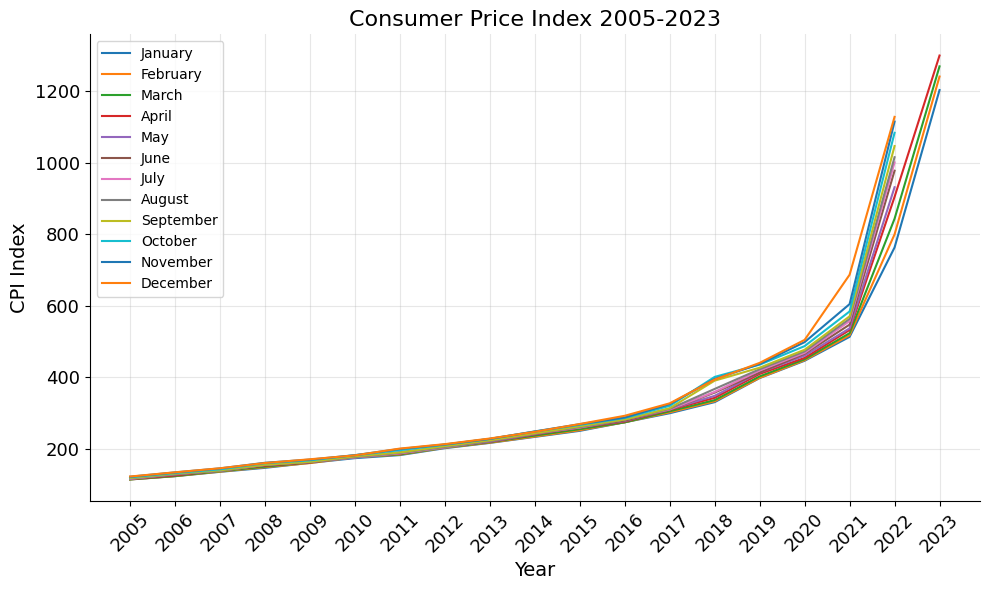

In [40]:
data = index_data
years = data["Year"]

# Select all columns except the 'Year' column
cpi_index = data.iloc[:, 1:]  

# Plot the CPI index over the years
plt.figure(figsize=(10, 6))
plt.plot(years, cpi_index)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CPI Index', fontsize=14)
plt.title('Consumer Price Index 2005-2023', fontsize=16)
plt.legend(cpi_index.columns)
plt.xticks(years, rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.grid(alpha=0.3)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig('cpi_eda_months_2005-2023.png')
plt.show()

# Correlation Analysis
Correlation analysis is a statistical technique used to measure the strength and direction of the relationship between two or more variables. It helps us understand how changes in one variable are associated with changes in another variable.

- The correlation analysis provides insights into the relationships between different CPI index columns.
- By visualizing the correlation matrix as a heatmap, we can quickly identify the strength and direction of correlations.
- Positive correlations (high values close to 1) indicate a direct relationship between CPI index columns, while negative correlations (low values close to -1) indicate an inverse relationship.
- This analysis helps in identifying which CPI index columns tend to move together or have an impact on each other.
- Understanding the correlations between CPI index columns can aid in uncovering underlying patterns, detecting leading or lagging indicators, and informing forecasting models or further analysis.

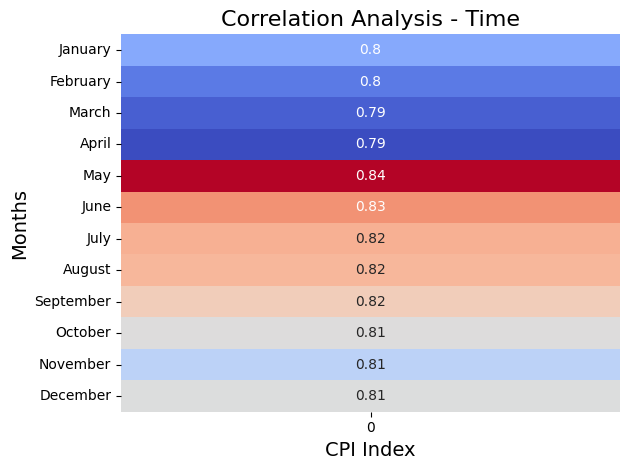

In [43]:
# Calculate correlation coefficient between CPI and time
correlation = cpi_index.corrwith(years)

# Plot correlation heatmap
sns.heatmap(correlation.to_frame(), annot=True, cmap="coolwarm", cbar=False)
plt.xlabel('CPI Index', fontsize=14)
plt.ylabel('Months', fontsize=14)
plt.title('Correlation Analysis - Time', fontsize=16)

plt.tight_layout()
plt.savefig('correlation_cpi_eda_2005-2023.png')
plt.show()

# Box Plot
A box plot, also known as a box-and-whisker plot, is a statistical visualization tool that provides a summary of the distribution of a continuous variable. It displays the key characteristics of the data, including the minimum, first quartile (25th percentile), median (50th percentile), third quartile (75th percentile), and maximum. Additionally, it can show any potential outliers in the dataset.

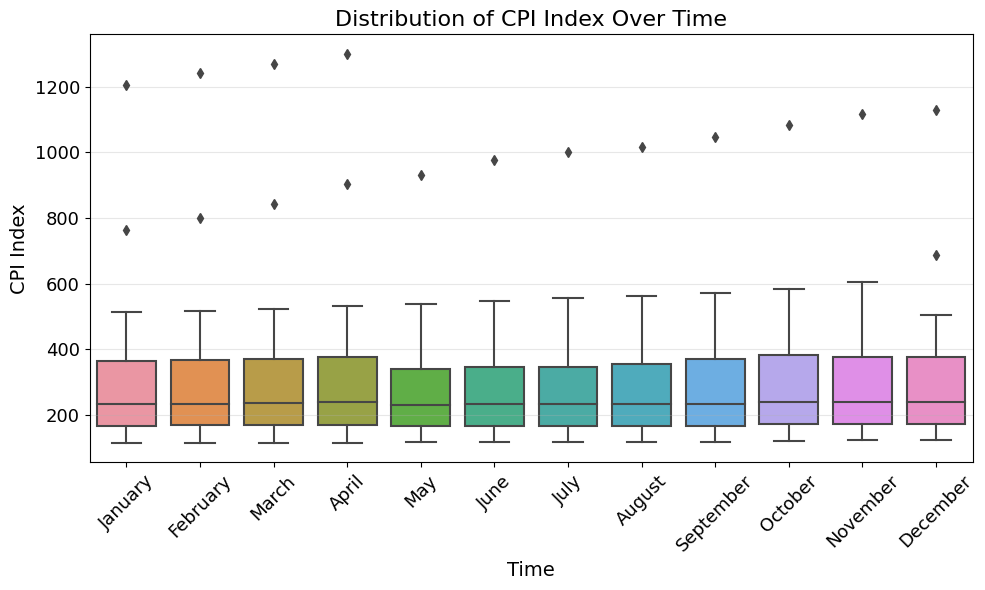

In [45]:
# Create a box plot of CPI values over time
plt.figure(figsize=(10, 6))
sns.boxplot(data=cpi_index)
plt.xlabel('Time', fontsize=14)
plt.ylabel('CPI Index', fontsize=14)
plt.title('Distribution of CPI Index Over Time', fontsize=16)
plt.xticks(fontsize=13, rotation=45)
plt.yticks(fontsize=13)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('cpi_boxplot_eda_2005-2023.png')
plt.show()

# Statistics
We can get a better grasp of the data via non-graphical ways as well. The easiest method would be to just print the statistics via the `.describe()` command. The code below shows the following items for each month separately:
1. count
2. mean
3. std
4. min
5. all 3 percentiles
6. max

In [49]:
# Calculate descriptive statistics
statistics = cpi_index.describe()

print(statistics)

           January     February        March        April         May  \
count    19.000000    19.000000    19.000000    19.000000   18.000000   
mean    324.767368   329.865263   335.414211   342.995789  293.377778   
std     267.258080   277.492156   286.781318   298.308311  198.739438   
min     114.490000   114.510000   114.810000   115.630000  116.690000   
25%     167.485000   168.470000   169.870000   170.415000  166.902500   
50%     233.540000   234.540000   237.180000   240.370000  230.695000   
75%     364.410000   365.940000   369.645000   376.205000  338.907500   
max    1203.480000  1241.330000  1269.750000  1300.040000  931.760000   

             June         July       August    September     October  \
count   18.000000    18.000000    18.000000    18.000000    18.00000   
mean   297.090000   299.737222   302.036111   306.954444   314.24000   
std    208.802497   214.282815   217.896673   224.737606   232.59585   
min    116.810000   116.140000   117.130000   118.3300

# Time Series Analysis
The concept of TSA was discussed earlier. Now, we convert the 'Year' column to datetime format, so that it can be used for later stages of the analysis.

This code will read the entire dataset from the CSV file and reshape it using the melt function. The 'Year' and 'Month' columns are then combined to create a 'Date' column, which is set as the index of the DataFrame. The unnecessary columns ('Year' and 'Month') are dropped, and the data is sorted by date.

The resulting `melted_data` DataFrame will have a standard time series format where each row represents a specific date, and the CPI values are in a single column.

In [47]:
# Read the CSV file
data = pd.read_csv('CPI_index_clean.csv')

# Reshape the data using the melt function
melted_data = pd.melt(data, id_vars='Year', var_name='Month', value_name='CPI')

# Convert the 'Year' and 'Month' columns to datetime format
melted_data['Date'] = pd.to_datetime(melted_data['Year'].astype(str) + '-' + melted_data['Month'], format='%Y-%B')
melted_data.set_index('Date', inplace=True)

# Drop the unnecessary columns
melted_data.drop(['Year', 'Month'], axis=1, inplace=True)

# Sort the data by date
melted_data.sort_index(inplace=True)

display(melted_data)

,CPI
Date,
2005-01-01,114.49
2005-02-01,114.51
2005-03-01,114.81
2005-04-01,115.63
2005-05-01,116.69
...,...
2023-08-01,NaN
2023-09-01,NaN
2023-10-01,NaN


# Dealing with NaN
Let's find the date where the NaN data appears first.

In [48]:
print(melted_data[0:-7])

                CPI
Date               
2005-01-01   114.49
2005-02-01   114.51
2005-03-01   114.81
2005-04-01   115.63
2005-05-01   116.69
...             ...
2023-01-01  1203.48
2023-02-01  1241.33
2023-03-01  1269.75
2023-04-01  1300.04
2023-05-01      NaN

[221 rows x 1 columns]


As we can see, the first 220 rows appear to have the CPI index. Hence, we store them as our total melted data.

In [50]:
melted_data = melted_data[0:220]
print(melted_data)

                CPI
Date               
2005-01-01   114.49
2005-02-01   114.51
2005-03-01   114.81
2005-04-01   115.63
2005-05-01   116.69
...             ...
2022-12-01  1128.45
2023-01-01  1203.48
2023-02-01  1241.33
2023-03-01  1269.75
2023-04-01  1300.04

[220 rows x 1 columns]


# Effects of Covid-19
As we all know, the Covid-19 outbreak caused great problems on a global level. Many people were affected, and also industries. Therefore, we aim to understand the effects of Covid-19 on the dataset, and how different the numbers would be if it was not for this virus.

<img width=75% src="https://www.fda.gov/files/Food-Flexibility-During-COVID-19_DRAFT_03.png" />

> [FDA Provides Flexibility to the Food Industry to Support Food Supply Chain and Meet Consumer Demand During COVID-19](https://www.fda.gov/news-events/fda-voices/fda-provides-flexibility-food-industry-support-food-supply-chain-and-meet-consumer-demand-during)

One can already tell that Covid caused massive changes in all economics indicators, and knowing so, we can proceed to measure such changes. 

# Data Splitting
For this purpose, the data shall be divided into 2 main parts:
1. From 2005 until September of 2019
2. From September of 2019 until 2023 (April)

Visualizations can give a better understanding of the different trends and patterns before the sudden change, and then by observing the predicable sudden changes in the CPI index after the pandemic, one can get a better grasp of the changes. For this task, time series analysis can give us the results needed.

In [51]:
# Read the CSV file
data = pd.read_csv('CPI_index_clean.csv')

# Reshape the data using the melt function
melted_data = pd.melt(data, id_vars='Year', var_name='Month', value_name='CPI')

# Convert the 'Year' and 'Month' columns to datetime format
melted_data['Date'] = pd.to_datetime(melted_data['Year'].astype(str) + '-' + melted_data['Month'], format='%Y-%B')

# Set the 'Date' column as the DataFrame index
melted_data.set_index('Date', inplace=True)

# Drop the unnecessary columns
melted_data.drop(['Year', 'Month'], axis=1, inplace=True)

# Sort the data by date
melted_data.sort_index(inplace=True)

# Split the data into training and test sets
train = melted_data[:'2019-09-01']
test = melted_data['2019-09-01':'2023-04-01']

# Descriptive Analysis
In the context of the CPI project, descriptive analysis helps provide an overview and understanding of the consumer price index data. It involves calculating and reporting descriptive statistics that capture important aspects of the CPI values over a specific time period. Common descriptive statistics used in this analysis include measures such as mean, median, standard deviation, quartiles, and range.

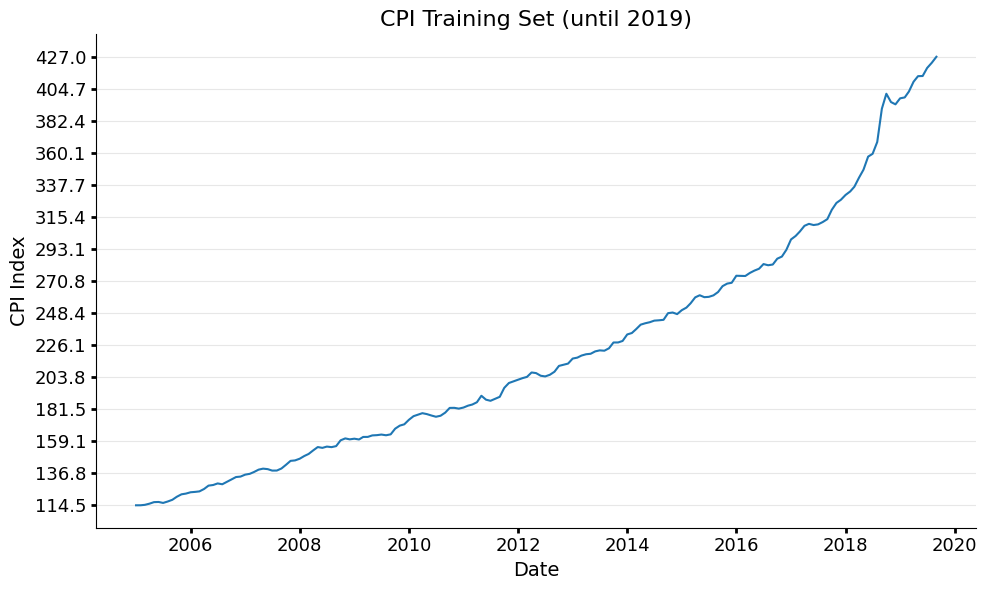

In [59]:
# Descriptive analysis
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['CPI'])
plt.title('CPI Training Set (until 2019)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('CPI Index', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(np.linspace(min(train['CPI']), max(train['CPI']), num=15), fontsize=13)
plt.grid(axis='y', alpha=0.3)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().tick_params(axis='both', which='major', width=2)
plt.tight_layout()
plt.savefig('cpi_descript_train_2005-2019.png')
plt.show()

# Smoothing (Moving Average)
Smoothing, specifically the Moving Average, is a technique used to reduce noise and uncover patterns or trends in time series data. In this code, a Moving Average is applied to the CPI index data.

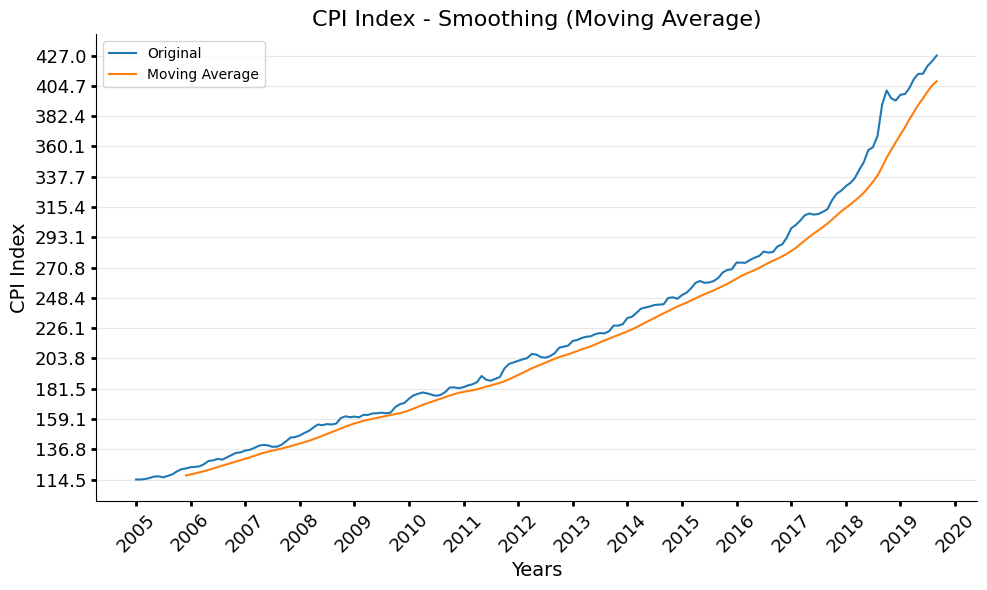

In [66]:
# Smoothing (Moving Average)
window = 12 
rolling_mean = train['CPI'].rolling(window=window).mean()

plt.figure(figsize=(10, 6))
plt.plot(train.index, train['CPI'], label='Original')
plt.plot(rolling_mean.index, rolling_mean, label='Moving Average')
plt.title('CPI Index - Smoothing (Moving Average)', fontsize=16)
plt.xlabel('Years', fontsize=14)
plt.ylabel('CPI Index', fontsize=14)
years = pd.date_range(start='2005', end='2020', freq='YS')
plt.xticks(years, years.year, rotation=45, fontsize=13)
plt.yticks(np.linspace(min(train['CPI']), max(train['CPI']), num=15), fontsize=13)
plt.grid(axis='y', alpha=0.3)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().tick_params(axis='both', which='major', width=2)
plt.legend()
plt.tight_layout()
plt.savefig('cpi_smooth_train_2005-2019.png')
plt.show()

# Stationarity Analysis
The provided code is performing stationarity analysis on the original data, specifically using the Dickey-Fuller test. The Dickey-Fuller test is a statistical test used to determine if a time series is stationary or not. Stationarity is an important property of a time series, as it implies that the statistical properties of the series do not change over time.

This code calculates the ADF statistic, p-value, and critical values using the Dickey-Fuller test to assess the stationarity of the time series data. The ADF statistic and p-value are key metrics used to determine the stationarity of the series, while the critical values provide a reference for making the determination.

In [68]:
# Stationarity analysis
def stationarity_analysis(data):
    # the Dickey-Fuller test
    result = adfuller(data)
    print('>>>\tADF Statistic:', result[0])
    print('\n>>>\tp-value:', result[1])
    print('\n>>>\tCritical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

print('>>>\tStationarity Analysis - Original Data')
stationarity_analysis(train['CPI'])

>>>	Stationarity Analysis - Original Data
>>>	ADF Statistic: 4.765834677572072

>>>	p-value: 1.0

>>>	Critical Values:
   1%: -3.468952197801766
   5%: -2.878495056473015
   10%: -2.57580913601947


Based on the results of the stationarity analysis for the original data using the Dickey-Fuller test, we can make the following observations:

## ADF Statistic
- The ADF (Augmented Dickey-Fuller) statistic is a test statistic in the Dickey-Fuller test that measures the presence of unit roots in the data, indicating whether the data is stationary or not.
- In this case, the ADF statistic is 4.765834677572072.

## P-value
- The p-value is a measure of the probability that the null hypothesis is true. In the context of the Dickey-Fuller test, the null hypothesis is that the data is non-stationary (it has a unit root).
- In this case, the p-value is 1.0.
- The p-value helps us determine the statistical significance of our results. If the p-value is less than a chosen significance level (e.g., 0.05), we can reject the null hypothesis. However, if the p-value is greater than the significance level, we fail to reject the null hypothesis.
- In this case, since the p-value is 1.0, which is greater than the commonly used significance level of 0.05, we fail to reject the null hypothesis. This suggests that the data is non-stationary and likely has a unit root.

## Critical Values
- Critical values are used in the Dickey-Fuller test to determine the significance of the ADF statistic.
- The critical values represent thresholds or cutoff points for the ADF statistic at different significance levels (e.g., 1%, 5%, and 10%).
- If the ADF statistic is more negative (i.e., smaller in absolute value) than the critical value, it provides evidence against the null hypothesis of non-stationarity.
- In this case, the critical values are as follows:
  - 1%: -3.468952197801766
  - 5%: -2.878495056473015
  - 10%: -2.57580913601947
- Since the ADF statistic (4.765834677572072) is greater than all the critical values, we do not have evidence to reject the null hypothesis. This further supports the finding that the data is likely non-stationary.

# Overall Interpretation
Based on the p-value being greater than the significance level and the ADF statistic being greater than the critical values, we can conclude that the original data (CPI) is likely non-stationary. This suggests that the data exhibits a trend or seasonality component that needs to be addressed before applying certain time series models that assume stationarity, such as ARIMA, which will be conducted in later cells.

# Time Series Decomposition
The provided code performs time series decomposition using the additive model and visualizes the original data, trend, seasonality, and residuals.

## Trend
The trend component represents the long-term pattern or direction in the data. It captures the overall upward or downward movement of the series over time.

## Seasonality
The seasonality component represents the repeating patterns or cycles within the data. It reflects regular fluctuations in the series that occur with a fixed frequency, such as daily, monthly, or yearly patterns.

## Residuals
The residuals, also known as the remainder or error component, represent the fluctuations that cannot be explained by the trend or seasonality. They capture the random or irregular variations in the series that are left after removing the trend and seasonality components. Residuals are often assumed to be noise or random fluctuations around the other components.

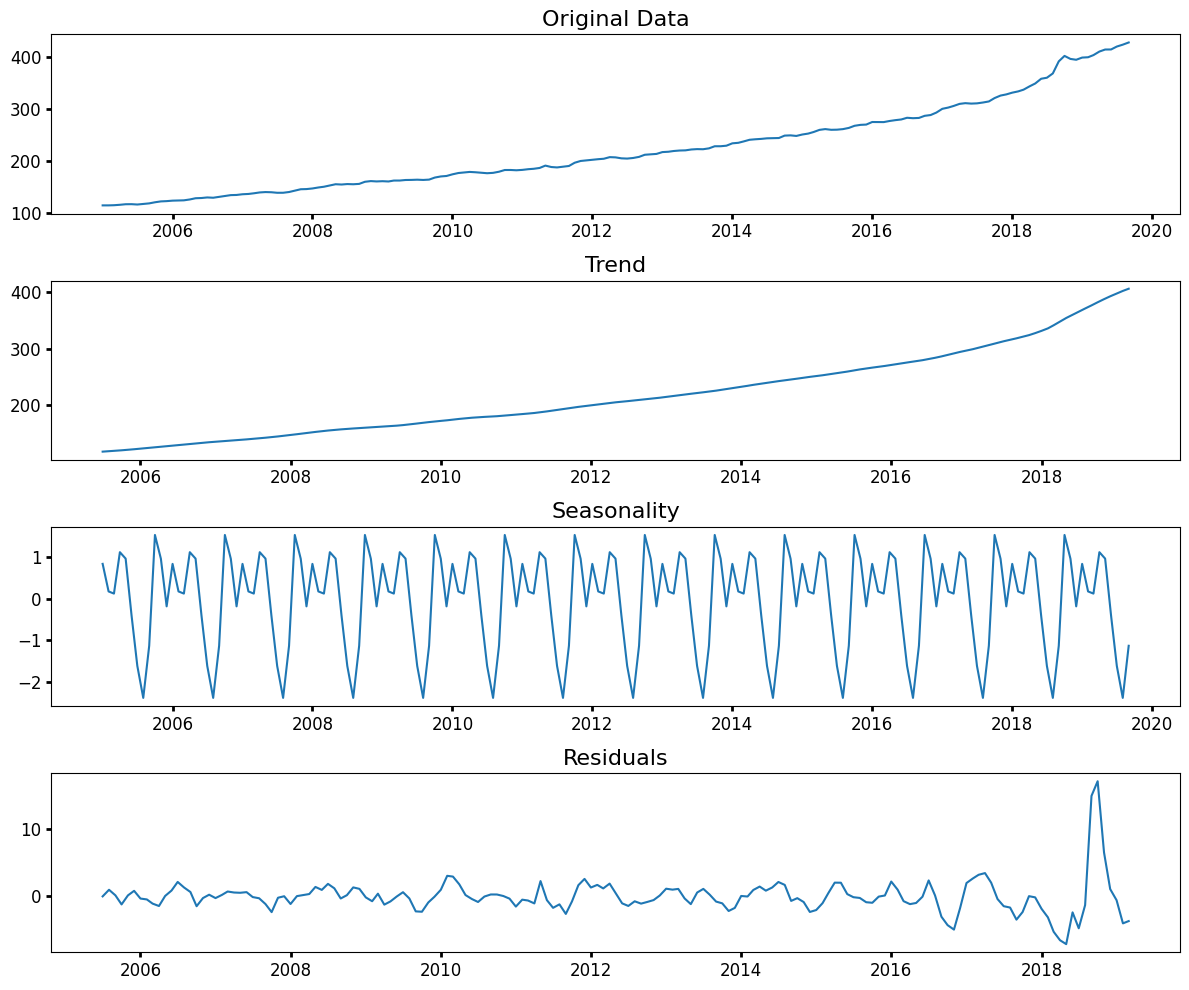

In [73]:
# Time series decomposition
decomposition = seasonal_decompose(train['CPI'], model='additive')

plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.plot(train.index, train['CPI'])
plt.title('Original Data', fontsize=16)
plt.tick_params(axis='both', which='both', labelsize=12, width=2)
plt.subplot(4, 1, 2)
plt.plot(train.index, decomposition.trend)
plt.title('Trend', fontsize=16)
plt.tick_params(axis='both', which='both', labelsize=12, width=2)
plt.subplot(4, 1, 3)
plt.plot(train.index, decomposition.seasonal)
plt.title('Seasonality', fontsize=16)
plt.tick_params(axis='both', which='both', labelsize=12, width=2)
plt.subplot(4, 1, 4)
plt.plot(train.index, decomposition.resid)
plt.title('Residuals', fontsize=16)
plt.tick_params(axis='both', which='both', labelsize=12, width=2)
plt.tight_layout()
plt.savefig('cpi_decomp_2005-2019.png')
plt.show()

# ARIMA
ARIMA (AutoRegressive Integrated Moving Average) is a popular time series forecasting model that combines the concepts of autoregression (AR) and moving average (MA) along with differencing (I) to capture the temporal dependencies and patterns in a time series data.

ARIMA models are widely used for forecasting tasks as they can effectively handle time-dependent data and capture both short-term and long-term trends. The model is particularly useful when dealing with stationary or near-stationary time series, where the mean and variance remain relatively constant over time.

<img width=75% src="https://www.investopedia.com/thmb/noI1hz_KHP3tQ0eDddnQIR-rL4c=/4000x2700/filters:no_upscale():max_bytes(150000):strip_icc()/autoregressive-integrated-moving-average-arima.asp-Final-cda3fcc744084e08808bc96d87b1f496.png">

> [Investopedia](https://www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp)

In our project, we have utilized ARIMA to forecast the Consumer Price Index (CPI) in Turkey. By analyzing historical CPI data, we aim to predict future CPI values and understand the inflation trends in the country. ARIMA models are suitable for this task as they can capture the seasonality, trends, and other temporal patterns present in the CPI data.

The ARIMA model takes into account the autoregressive component (AR) to model the linear relationship between past observations and the current observation, the moving average component (MA) to account for the residual errors, and the differencing component (I) to make the time series stationary if required. By adjusting the order of these components (p, d, q), we can customize the ARIMA model to fit the specific characteristics of the CPI data.

By using ARIMA, we can generate forecasts and gain insights into future inflation trends, which can be valuable for various purposes such as economic planning, policy-making, and financial decision-making. It helps us understand the patterns and dynamics of inflation, identify potential risks, and make informed projections based on historical data.

In [74]:
# Read the CSV file
data = pd.read_csv('CPI_index_clean.csv')

# Reshape the data using the melt function
melted_data = pd.melt(data, id_vars='Year', var_name='Month', value_name='CPI')

# Convert the 'Year' and 'Month' columns to datetime format
melted_data['Date'] = pd.to_datetime(melted_data['Year'].astype(str) + '-' + melted_data['Month'], format='%Y-%B')

# Set the 'Date' column as the DataFrame index
melted_data.set_index('Date', inplace=True)

# Drop the unnecessary columns
melted_data.drop(['Year', 'Month'], axis=1, inplace=True)

# Sort the data by date
melted_data.sort_index(inplace=True)

# Set the frequency of the data to monthly
melted_data = melted_data.asfreq('MS')

# Split the data into training and test sets
train = melted_data[:'2019-09-01']
test = melted_data['2019-09-01':'2023-04-01']

# Addressing the Non-stationary Issue
The initial parameters provided to the model are non-stationary, which can lead to inaccurate forecasting results.

To address this issue, we can try a couple of methods:
1. **Differencing:** differencing can be used to transform it into a stationary series. We can apply differencing to the data before fitting the ARIMA model.

2. **Adjust Model Order:** Another approach is to adjust the order of the ARIMA model. The order of the model determines the number of autoregressive (p), differencing (d), and moving average (q) terms. By modifying these values, we can try different combinations to improve the model's fit.

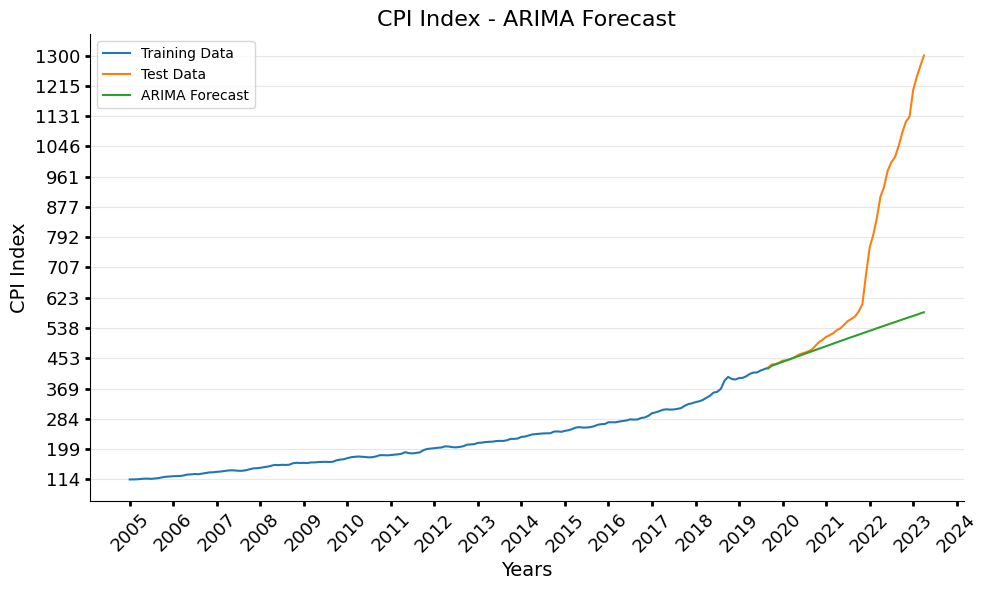

In [82]:
# Apply differencing to the training data
train_diff = train['CPI'].diff().dropna()

# Fit the ARIMA model with differenced data
model = ARIMA(train_diff, order=(1, 0, 1))
arima_model = model.fit()

# Forecast using the ARIMA model with differenced data
forecast_diff = arima_model.predict(start=test.index[0], end=test.index[-1])

# Convert the differenced forecast back to the original scale
forecast = train['CPI'].iloc[-1] + forecast_diff.cumsum()

# The ordering of these numbers needs more work
model = ARIMA(train['CPI'], order=(2, 1, 2))

arima_model = model.fit()

# Forecast using the ARIMA model
forecast = arima_model.predict(start=test.index[0], end=test.index[-1])

# Plot the ARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['CPI'], label='Training Data')
plt.plot(test.index, test['CPI'], label='Test Data')
plt.plot(forecast.index, forecast, label='ARIMA Forecast')
plt.title('CPI Index - ARIMA Forecast', fontsize=16)
plt.xlabel('Years', fontsize=14)
plt.ylabel('CPI Index', fontsize=14)
years = pd.date_range(start='2005', end='2024', freq='YS')
plt.xticks(years, years.year, rotation=45, fontsize=13)
plt.yticks(np.linspace(min(train['CPI']), max(test['CPI']), num=15), fontsize=13)
plt.grid(axis='y', alpha=0.3)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().tick_params(axis='both', which='major', width=2)
plt.legend()
plt.tight_layout()
plt.savefig('cpi_arima_forecast.png')
plt.show()

# Forecasted Values of ARIMA
We can now print the forecasted values of our ARIMA model, and see what the model has predicted after the September of 2019.

In [92]:
print(">>>\tThe forecast for dates after September 2019:")
forecast.describe()

>>>	The forecast for dates after September 2019:


count 44.000000
mean 506.338089
std 46.071507
min 424.618783
25% 468.163870
50% 507.044137
75% 545.024699
max 582.126365
Name: predicted_mean, dtype: float64

# Test Data
Here, `test`, which is a Pandas series, represents the real values of the dataset after September 2019. 

In [94]:
test.describe()

,CPI
count,44.000000
mean,698.681136
std,282.432658
min,427.040000
25%,471.597500
50%,552.420000
75%,943.295000
max,1300.040000


# Comparison Between Forecast & Test Data
We can now compare the predicted values, with the real data points, and see how accurate the ARIMA model has forecasted 
## Mean Squared Error
$$\Large
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

## Mean Aboslte Error
$$\Large
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

In [95]:
series1 = pd.Series(test.squeeze())
series2 = pd.Series(forecast.squeeze())

# Mean Squared Error (MSE)
mse = mean_squared_error(series1, series2)

# Mean Absolute Error (MAE)
mae = np.mean(np.abs(series1 - series2), axis=0)

print(">>>\tMSE:", mse)
print(">>>\tMAE:", mae)

>>>	MSE: 93591.59973882654
>>>	MAE: 192.34814747544587


Based on the MSE (Mean Squared Error) and MAE (Mean Absolute Error) values obtained for the forecast and test data, we can draw the following conclusions:

## MSE
The MSE value is 93591.59973882654. This metric measures the average squared difference between the predicted values and the actual values. A lower MSE indicates better accuracy in the forecast. In this case, the MSE value suggests that, on average, the forecasted values deviate from the actual values by approximately 93591.60 squared units.

## MAE
The MAE value is 192.34814747544587. This metric measures the average absolute difference between the predicted values and the actual values. Similar to the MSE, a lower MAE indicates better accuracy in the forecast. In this case, the MAE value indicates that, on average, the forecasted values deviate from the actual values by approximately 192.35 units.

# Interpretation
The MSE and MAE values provide insights into the performance of the forecasted values compared to the actual values. With a relatively high MSE and MAE, it suggests that the forecast has a moderate level of error and may not be perfectly accurate. However, it is essential to consider the context of the project.

Considering that the project involves analyzing the CPI (Consumer Price Index) over time, where the training and test data were split in September 2019, it is worth noting that CPI data is known to be influenced by various factors, most importantly, Covid-19.

Therefore, the MSE and MAE values need to be evaluated in the context of the CPI data's inherent volatility and sensitivity to multiple factors. While the forecast may not be highly accurate based on these metrics alone, it can still provide valuable insights and trends in the CPI data.

Overall, while the MSE and MAE values indicate some level of forecast error, they should be interpreted alongside domain knowledge and other evaluation metrics to assess the overall quality of the forecast and to gain a comprehensive understanding of the CPI data's behavior over time.

# Summary
In this project, we have conducted an in-depth analysis of the Consumer Price Index (CPI) data from 2005 to 2023. Our goal was to understand the trends, patterns, and dynamics of CPI over time and develop a forecasting model to predict future CPI values.

We began by performing exploratory data analysis (EDA) to gain insights into the data. We visualized the CPI index over the years using line plots, which provided an overview of the CPI's general trend. We also conducted correlation analysis to examine the relationship between CPI and time. Through these analyses, we observed the overall upward trend of CPI and identified potential correlations with certain periods or events.

Next, we delved into descriptive analysis to summarize the central tendencies and dispersion of the CPI values. We calculated key statistical measures such as mean, median, standard deviation, and quartiles, which provided a comprehensive overview of the data's characteristics. These statistics helped us understand the average CPI value, its variability, and the distribution of CPI across different time points.

To further analyze the data, we employed time series decomposition techniques using methods like moving averages. This allowed us to separate the data into its trend, seasonality, and residual components. By visualizing these components, we gained insights into the long-term trends, recurring patterns, and irregular variations in CPI.

Additionally, we examined the stationarity of the data using the Dickey-Fuller test. The results of the test provided information on the stationarity of the CPI series, which is essential for time series analysis and forecasting. We observed the ADF statistic, p-value, and critical values to determine if the data was stationary or required further transformations to achieve stationarity.

To forecast future CPI values, we implemented the ARIMA (Autoregressive Integrated Moving Average) model. This model combines autoregressive (AR), differencing (I), and moving average (MA) components to capture the time-dependent behavior and predict future values. We trained the model using the training dataset, and then evaluated its performance using the test dataset. We calculated metrics such as MSE (Mean Squared Error) and MAE (Mean Absolute Error) to assess the accuracy of the forecast.

<img width=75% src="https://bm.ge/uploads/news/63fc4f15287cb.jpg">

> [Business Media: TURKISH ECONOMY LIKELY GREW 5.2% IN 2022](https://bm.ge/en/article/turkish-economy-likely-grew-52-in-2022-quakes-curb-2023-outlook/127847)

# Conclusion
Based on the evaluation metrics and analysis, we concluded that while the forecasted CPI values had a moderate level of error, they provided valuable insights and trends in the CPI data. We recognized the inherent volatility and complexity of CPI data, influenced by various economic factors and external events. Therefore, it is crucial to interpret the forecast results within the context of these factors and consider them as part of the overall analysis.

In conclusion, this project has provided a comprehensive exploration of CPI data, including visualization, correlation analysis, descriptive analysis, time series decomposition, and forecasting using the ARIMA model. It has allowed us to understand the historical trends, patterns, and dynamics of CPI over time and make informed predictions about future CPI values. This analysis can assist policymakers, economists, and stakeholders in making informed decisions, forecasting inflation rates, and understanding the economic landscape.